In [1]:
%matplotlib inline

#import dependencies
import pandas as pd, json
import psycopg2
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
host_address = 'bootcamp-final-project.c8u2worjd1ui.us-east-1.rds.amazonaws.com'
port = '5432'
username = 'peter_jennifer'
password = 'Puhj6k2%pbW'
db = 'us_gun_violence'


In [3]:
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(
                username=username,
                password=password,
                ipaddress=host_address,
                port=port,
                dbname=db))
# Create the connection
engine = create_engine(postgres_str)

In [4]:
suspects_df = pd.read_sql_query('''SELECT * FROM suspects;''', engine)
incidents_df = pd.read_sql_query('''SELECT * FROM incidents;''', engine)
guns_df = pd.read_sql_query('''SELECT * FROM guns;''', engine)

In [5]:
guns_df_dup = guns_df.drop_duplicates(subset='incident_id')
guns_df_dup

,gun_index,incident_id,n_guns_involved,gun_stolen,gun_type
0,0,478855,2,Unknown,Unknown
2,2,478959,2,Unknown,Handgun
4,4,479363,2,Unknown,22 LR
6,6,491674,1,Unknown,Unknown
7,7,479413,1,Unknown,Unknown
...,...,...,...,...,...
192446,192446,1083142,1,Unknown,Unknown
192447,192447,1083139,1,Unknown,Unknown
192448,192448,1083151,1,Unknown,Unknown
192449,192449,1082514,1,Unknown,Unknown


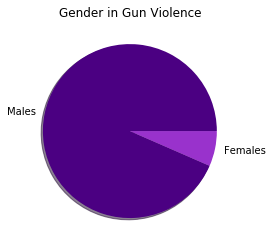

([<matplotlib.patches.Wedge at 0x1a20b339b0>,
 [Text(-1.0768257524027536, 0.22460253552051493, 'Males'),
  Text(1.0768257366311456, -0.2246026111352916, 'Females')])

In [6]:
#male vs female
count = suspects_df.participant_gender.value_counts()
counts = [167708, 11746]
labels = ['Males', 'Females']
colors = ['indigo', 'darkorchid']

fig_gender = plt.pie(counts, labels=labels, colors=colors, shadow=True)

plt.title('Gender in Gun Violence')

plt.show()

fig_gender

<BarContainer object of 10 artists>

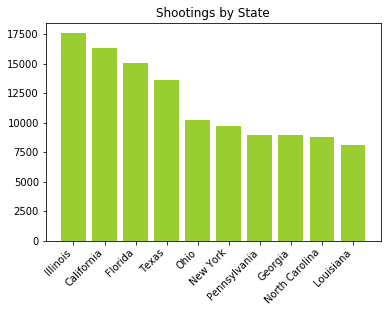

In [7]:
#shootings by politician/district/state
states = pd.DataFrame(incidents_df.state.value_counts())
state = states.index
shootings = states.state.tolist()

#graph
fig_states = plt.bar(state[:10], shootings[:10], color='yellowgreen')
plt.xticks(state[:10], rotation=45, ha='right')
plt.title('Shootings by State')

fig_states

<BarContainer object of 10 artists>

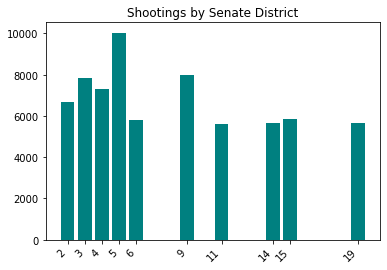

In [8]:
#shootings by politician/district
district = pd.DataFrame(incidents_df.state_senate_district.value_counts())
senate = district.index
shootings = district.state_senate_district.tolist()

#graph
fig_senate = plt.bar(senate[:10], shootings[:10], color='teal')
plt.xticks(senate[:10], rotation=45, ha='right')
plt.title('Shootings by Senate District')

fig_senate

<BarContainer object of 10 artists>

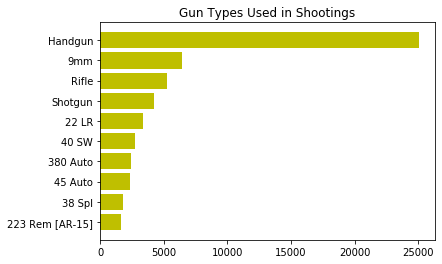

In [9]:
#shootings by politician/district
guns = pd.DataFrame(guns_df.gun_type.value_counts())
labels = guns.index
number = guns.gun_type.tolist()
total = sum(number)
percentages = []
for n in number[1:27]:
    percent = (n/total ) * 100
    percentages.append(percent)
    
fig_guns = plt.barh(labels[1:11], number[1:11], align='center', color='y')
plt.gca().invert_yaxis()

plt.title('Gun Types Used in Shootings')

fig_guns

<BarContainer object of 3 artists>

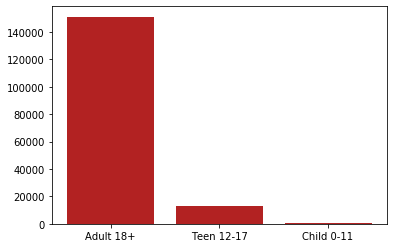

In [10]:
age_groups = pd.DataFrame(suspects_df.participant_age_group.value_counts())

groups = age_groups.index
number = age_groups.participant_age_group.tolist()

fig_age_group = plt.bar(groups, number, color='firebrick')
plt.xticks(groups)

fig_age_group

/Users/jennifertian/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jennifertian/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7900e+02, 3.7600e+02, 1.6032e+04, 3.3748e+04, 2.5125e+04,
        1.3518e+04, 7.7910e+03, 5.2450e+03, 3.8620e+03, 2.7000e+03,
        1.1740e+03, 6.6100e+02, 3.0300e+02, 1.8500e+02, 4.2000e+01,
        7.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.  ,   6.22,  12.44,  18.66,  24.88,  31.1 ,  37.32,  43.54,
         49.76,  55.98,  62.2 ,  68.42,  74.64,  80.86,  87.08,  93.3 ,
         99.52, 105.74, 111.96, 118.18, 124.4 , 130.62, 136.84, 143.06,
        149.28, 155.5 , 161.72, 167.94, 174.16, 180.38, 186.6 , 192.82,
        199.04, 205.26, 211.48

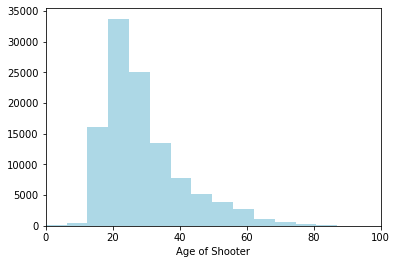

In [11]:
age = suspects_df.participant_age
incidents = suspects_df.participant_status

fig_ages = plt.hist(age, bins=50, color='lightblue')
plt.xlim(0,100)
plt.xlabel('Age of Shooter')
fig_ages

In [12]:
guns_df.gun_stolen.value_counts()

Unknown       172525
Stolen         17610
Not-stolen      1804
Name: gun_stolen, dtype: int64

In [13]:
guns_df.gun_stolen.value_counts()
gun_ownership = guns_df.loc[(guns_df['gun_stolen'] == 'Stolen') | (guns_df['gun_stolen'] == 'Not-stolen')] 

gun_owners_df = gun_ownership.merge(incidents_df, on= 'incident_id', how='left')

gun_owners_df

,gun_index,incident_id,n_guns_involved,gun_stolen,gun_type,date,state,latitude,longitude,n_killed,n_injured,incident_characteristics,notes,congressional_district,state_house_district,state_senate_district
0,26,484333,2,Not-stolen,40 SW,2013-04-21,Washington,47.3030,-122.3100,5,0,"Shot - Dead (murder, accidental, suicide)||Hom...",None,9.0,30.0,30.0
1,51,489581,2,Not-stolen,223 Rem [AR-15],2013-06-07,California,34.0260,-118.4610,6,1,"Shot - Wounded/Injured||Shot - Dead (murder, a...","ms; 1 inj, 6 killed, including shooter. Incide...",33.0,50.0,26.0
2,99,480691,2,Stolen,Handgun,2013-09-24,West Virginia,38.4136,-82.4609,0,6,Shot - Wounded/Injured||Mass Shooting (4+ vict...,None,3.0,17.0,5.0
3,100,480691,2,Stolen,Handgun,2013-09-24,West Virginia,38.4136,-82.4609,0,6,Shot - Wounded/Injured||Mass Shooting (4+ vict...,None,3.0,17.0,5.0
4,164,93918,2,Stolen,22 LR,2014-01-07,Virginia,36.8802,-80.0085,0,2,Shot - Wounded/Injured||Home Invasion||Officer...,.22-caliber revolver and a Mauser hunting rifle,5.0,9.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19409,192308,1083233,8,Stolen,Rifle,2018-03-30,Colorado,NaN,NaN,0,0,Non-Shooting Incident||Gun(s) stolen from owner,Guns stolen from shed.,NaN,NaN,NaN
19410,192309,1083233,8,Stolen,Rifle,2018-03-30,Colorado,NaN,NaN,0,0,Non-Shooting Incident||Gun(s) stolen from owner,Guns stolen from shed.,NaN,NaN,NaN
19411,192316,1081863,1,Stolen,Handgun,2018-03-31,Ohio,NaN,NaN,0,0,Non-Shooting Incident||Gun(s) stolen from owner,Gun stolen from residence.,NaN,NaN,NaN
19412,192321,1081864,2,Stolen,Unknown,2018-03-31,Ohio,NaN,NaN,0,0,Non-Shooting Incident||Gun(s) stolen from owner,Multiple guns (# unspecified) stolen from resi...,NaN,NaN,NaN


In [14]:
il_guns = gun_owners_df.loc[gun_owners_df['state'] == 'Illinois']
test = il_guns.gun_stolen.value_counts()

test

Stolen        647
Not-stolen     17
Name: gun_stolen, dtype: int64

In [15]:
top_5 = ['Illinois', 'California', 'Florida', 'Texas', 'Ohio']
def state_guns(df, column1, column2, top5):
    not_stolen = []
    stolen = []
    for state in top5:
        guns = df.loc[df[column1] == state]
        s_ns = guns[column2].value_counts().tolist()
        not_stolen.append(s_ns[1])
        stolen.append(s_ns[0])
    return not_stolen, stolen

not_stolen, stolen = state_guns(gun_owners_df, 'state', 'gun_stolen', top_5)

Illinois: [232, 16]
California: [274, 63]
Florida: [630, 165]
Texas: [354, 159]
Ohio: [204, 41]
    

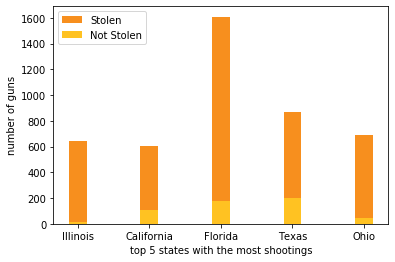

In [16]:
width = 0.25 
fig_stolen = plt.bar(top_5, stolen, width, color='#F78F1E')
fig_notstolen = plt.bar(top_5, not_stolen, width, color='#FFC222')

plt.xticks(top_5)
plt.xlabel('top 5 states with the most shootings')
plt.ylabel('number of guns')
plt.legend(['Stolen', 'Not Stolen'], loc='upper left')           


In [17]:
incidents_df

,incident_id,date,state,latitude,longitude,n_killed,n_injured,incident_characteristics,notes,congressional_district,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,40.3467,-79.8559,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,Julian Sims under investigation: Four Shot and...,14.0,NaN,NaN
1,460726,2013-01-01,California,33.9090,-118.3330,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Four Shot; One Killed; Unidentified shooter in...,43.0,62.0,35.0
2,478855,2013-01-01,Ohio,41.4455,-82.1377,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",None,9.0,56.0,13.0
3,478925,2013-01-05,Colorado,39.6518,-104.8020,4,0,"Shot - Dead (murder, accidental, suicide)||Off...",None,6.0,40.0,28.0
4,478959,2013-01-07,North Carolina,36.1140,-79.9569,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Two firearms recovered. (Attempted) murder sui...,6.0,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,NaN,NaN,0,0,Shots Fired - No Injuries,None,NaN,NaN,NaN
239673,1083139,2018-03-31,Louisiana,31.7537,-93.0836,1,0,"Shot - Dead (murder, accidental, suicide)||Ins...",None,4.0,23.0,31.0
239674,1083151,2018-03-31,Louisiana,29.9239,-90.0442,0,1,Shot - Wounded/Injured,None,2.0,85.0,7.0
239675,1082514,2018-03-31,Texas,29.7201,-95.6110,1,0,"Shot - Dead (murder, accidental, suicide)","Vic was found shot to death in car on 4/1/18, ...",9.0,149.0,17.0


In [23]:
map_df = incidents_df[['date', 'latitude', 'longitude', 'n_killed', 'notes']]

map_df.to_csv('Resources/gmaps.csv')

def lat_lng(df, col1, col2):
    lat_lngs = []
    for i in range(len(df)):
        pair = (df.loc[i, col1], df.loc[i, col2])
        lat_lngs.append(pair)
    return lat_lngs

lat_lng = lat_lng(map_df, 'latitude', 'longitude')

In [24]:
map_df['lat_lng'] = lat_lng
map_df = map_df.drop(['latitude', 'longitude'], axis=1)

/Users/jennifertian/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
map_df = map_df.dropna()

map_df.to_csv('Resources/map.csv')

In [41]:
col = ['date', 'n_killed', 'notes']
map_df

,date,n_killed,notes,lat_lng
0,2013-01-01,0,Julian Sims under investigation: Four Shot and...,"(40.3467, -79.8559)"
1,2013-01-01,1,Four Shot; One Killed; Unidentified shooter in...,"(33.909, -118.333)"
4,2013-01-07,2,Two firearms recovered. (Attempted) murder sui...,"(36.114, -79.9569)"
7,2013-01-21,0,Unprovoked drive-by results in multiple teens ...,"(29.9435, -90.0836)"
8,2013-01-21,0,Perps were likely motivated by gang affliations,"(37.9656, -121.718)"
...,...,...,...,...
239669,2018-03-31,0,.45 shell casing recovered,"(nan, nan)"
239670,2018-03-31,0,"Rt. leg, good; walk-up by 1;","(nan, nan)"
239671,2018-03-31,0,DV call leads to seizure of firearms during ar...,"(47.6638, -117.235)"
239675,2018-03-31,1,"Vic was found shot to death in car on 4/1/18, ...","(29.7201, -95.611)"


In [37]:
def df_to_geojson(df, properties, lat_lng = 'lat_lng'):
    geojson = {"type":"FeatureCollection", "features":[]}
    for _, row in df.iterrows():
        feature = {"type": "Feature",
                   "geometry": {"type": "Point",
                               "coordinates": []},
                   "properties": {}}
        feature["geometry"]["coordinates"] = [row[lat_lng]]
        for prop in properties:
            feature["properties"][prop] = row[prop]
        geojson["features"].append(feature)
    return geojson

In [38]:
geojson_dict = df_to_geojson(map_df, col)

geojson_str = json.dumps(geojson_dict, indent=2, sort_keys=True, default=str)

In [39]:
# save the geojson result to a file
output_filename = 'static/js/incident.json'
with open(output_filename, 'w') as output_file:
    output_file.write('var dataset = {};'.format(geojson_str))
    
# how many features did we save to the geojson file?
print('{} geotagged features saved to file'.format(len(geojson_dict['features'])))

158660 geotagged features saved to file


In [26]:
output_filename

'static/js/incident.js'